# HDDM mediators analysis

Imports

In [3]:
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from factor_analyzer import FactorAnalyzer
from statsmodels.stats.multitest import multipletests

In [2]:
# read beh, num trials in analysis, questio and make a correlation with delta_ne, alpha_ne

## Read data

Read behavioral and questionnarie data

In [52]:
# behavioral_data = pd.read_csv('../data/beh_sonata.csv')
questionnarie_data = pd.read_csv('../data/sonata_scales.csv').rename(columns={'Demo_kod': 'ID'})

# data_df = pd.merge(
#     behavioral_data, 
#     questionnarie_data, 
#     on='ID', 
#     how='inner'
# ) 

data_df = questionnarie_data

In [54]:
columns_base = [
    'ID',
    # 'IUI-A General Unacceptability of Uncertainty',
    'IUI-B Avoidance',
    'IUI-B Doubting',
    'IUI-B Overestimation',
    'IUI-B Worrying',
    'IUI-B Control',
    'IUI-B Reassurance',
    # 'IUI-B Negative Manifestation of Uncertainty',
    # 'Intolerance of Uncertainty - Prospective Anxiety',
    # 'Intolerance of Uncertainty - Inhibitory Anxiety',
    # 'Thought Suppression Inventory',
    # 'Guilt sensitivity',
    # 'SP (Punishment Sensitivity)',
    # 'TCQ Distraction',
    # 'TCQ Social Control',
    # 'TCQ Worry',
    # 'TCQ Punishment',
    # 'TCQ Re-Appraisal',
    'KTM Positive beliefs',
    'KTM Negative beliefs',
    'KTM Cognitive confidence',
    'KTM Need for control',
    'KTM Self-consciousness',
    # 'Obsessional Beliefs - Importance/Control of Thoughts',
    # 'STAI Trait SUM',
    # 'DASS-21 Stress scale 0-SUM',
    # 'DASS-21 Depression scale 0-SUM',
    # 'BAS Dzialanie',
    # 'BAS Poszukiwanie przyjemnosci',
    # 'BAS Wrazliwosc na nagrode',
    'BIS',
    # 'Obsessive-Compulsive WASHING',
    # 'Obsessive-Compulsive OBSESSING',
    # 'Obsessive-Compulsive HOARDING',
    # 'Obsessive-Compulsive ORDERING',
    # 'Obsessive-Compulsive CHECKING',
    # 'Obsessive-Compulsive NEUTRALIZING',
    'Rumination Full Scale',
    'Nietolerancja wieloznaczności-FULL',
    'SR (Reward Sensitivity)',
    'number_error',
    'Płeć',
]

columns = [
    'ID',
    'IUI-A General Unacceptability of Uncertainty',
    'IUI-B Avoidance',
    'IUI-B Doubting',
    'IUI-B Overestimation',
    'IUI-B Worrying',
    'IUI-B Control',
    'IUI-B Reassurance',
    'IUI-B Negative Manifestation of Uncertainty',
    # 'Intolerance of Uncertainty - Prospective Anxiety',
    # 'Intolerance of Uncertainty - Inhibitory Anxiety',
    # 'Thought Suppression Inventory',
    # 'Guilt sensitivity',
    # 'SP (Punishment Sensitivity)',
    'TCQ Distraction',
    'TCQ Social Control',
    'TCQ Worry',
    'TCQ Punishment',
    'TCQ Re-Appraisal',
    'KTM Positive beliefs',
    'KTM Negative beliefs',
    'KTM Cognitive confidence',
    'KTM Need for control',
    'KTM Self-consciousness',
    # 'Obsessional Beliefs - Importance/Control of Thoughts',
    # 'STAI Trait SUM',
    # 'DASS-21 Stress scale 0-SUM',
    # 'DASS-21 Depression scale 0-SUM',
    # 'BAS Dzialanie',
    # 'BAS Poszukiwanie przyjemnosci',
    # 'BAS Wrazliwosc na nagrode',
    'BIS',
    'Obsessive-Compulsive WASHING',
    'Obsessive-Compulsive OBSESSING',
    'Obsessive-Compulsive HOARDING',
    'Obsessive-Compulsive ORDERING',
    'Obsessive-Compulsive CHECKING',
    'Obsessive-Compulsive NEUTRALIZING',
    'Rumination Full Scale',
    'Nietolerancja wieloznaczności-FULL',
    'SR (Reward Sensitivity)',
    # 'number_error',
    'Płeć',
]

data_df = data_df[columns]
data_df['Płeć'] = data_df['Płeć'].replace('Osoba niebinarna', 0.5)

/tmp/ipykernel_5703/2280775200.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Płeć'] = data_df['Płeć'].replace('Osoba niebinarna', 0.5)


----

### Factor analysis

In [93]:
data_for_factor_df = data_df[columns]
# data_df['Płeć'] = data_df['Płeć'].replace('Osoba niebinarna', 0.5)

In [94]:
data_for_factor_df = data_for_factor_df.astype(float)

In [95]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_for_factor_df)
kmo_model

/home/anna/Work/jointError_cmd_test/venv/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8713828414037254

In [96]:
fa = FactorAnalyzer(38, rotation='varimax')
fa.fit(data_for_factor_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.00490459e+01, 3.04407766e+00, 2.29589209e+00, 2.04179739e+00,
       1.69349891e+00, 1.49912384e+00, 1.25362630e+00, 1.11738450e+00,
       1.07487073e+00, 1.00170742e+00, 9.18178851e-01, 8.70863343e-01,
       8.33835329e-01, 7.54254595e-01, 6.71726073e-01, 6.46563235e-01,
       6.23007655e-01, 6.12752556e-01, 5.49156307e-01, 5.03178317e-01,
       4.85135028e-01, 4.46027146e-01, 4.21150254e-01, 3.97761952e-01,
       3.81178923e-01, 3.65022409e-01, 3.39174421e-01, 3.22924571e-01,
       3.08300117e-01, 2.81280018e-01, 2.46479351e-01, 2.41813874e-01,
       2.24410711e-01, 1.87341819e-01, 1.63486617e-01, 1.33971792e-01,
       8.42335161e-16])

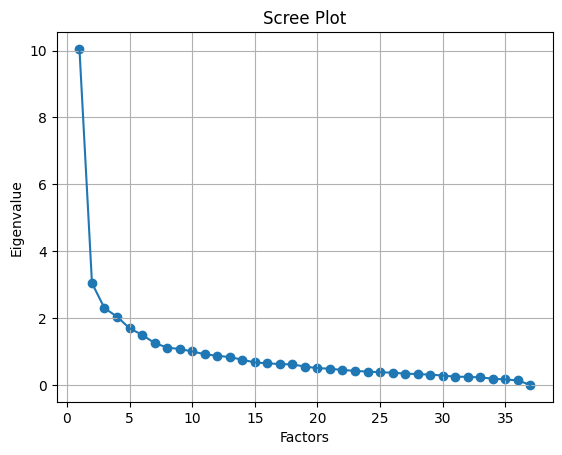

In [97]:
# Create scree plot using matplotlib
plt.scatter(range(1,data_for_factor_df.shape[1]+1),ev)
plt.plot(range(1,data_for_factor_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [99]:
# Number of factors to extract (adjust as needed)
n_factors = 10

# Initialize factor analyzer
fa = FactorAnalyzer(n_factors, rotation='promax')  # No rotation specified for now

# Fit the factor analyzer to your data
fa.fit(data_for_factor_df)

# Get the factor loadings
factor_loadings = fa.loadings_

# Get the communalities
communalities = fa.get_communalities()

# Get the eigenvalues
ev, v = fa.get_eigenvalues()

# Get the variance explained by each factor
variance_explained = fa.get_factor_variance()

variance_explained

(array([4.86810468, 4.86514572, 2.37769833, 1.78967081, 1.4646513 ,
        1.38139223, 1.17565359, 1.04207663, 0.91160201, 0.85302228]),
 array([0.1315704 , 0.13149042, 0.06426212, 0.04836948, 0.03958517,
        0.03733493, 0.03177442, 0.02816423, 0.02463789, 0.02305466]),
 array([0.1315704 , 0.26306082, 0.32732294, 0.37569242, 0.41527759,
        0.45261252, 0.48438694, 0.51255117, 0.53718906, 0.56024372]))

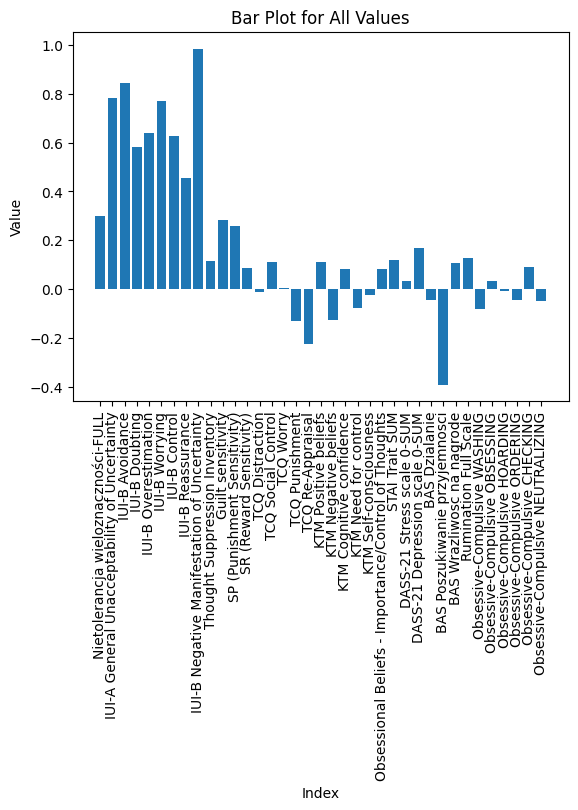

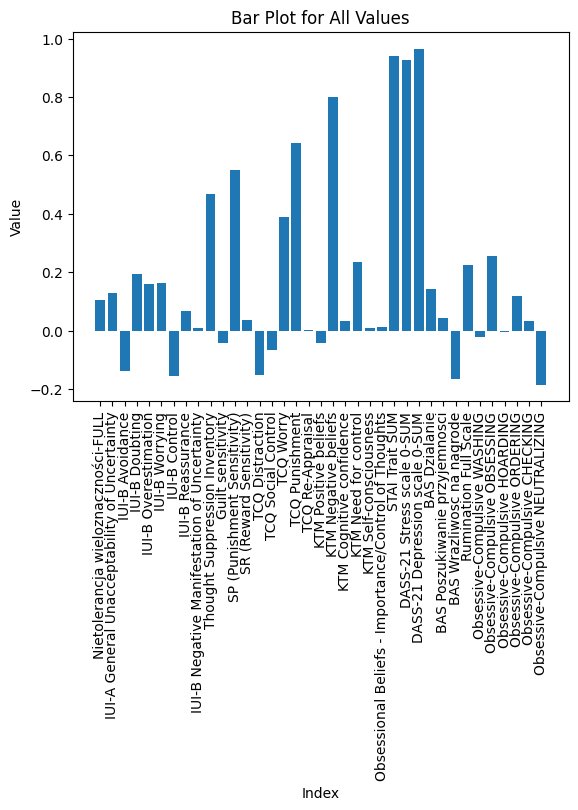

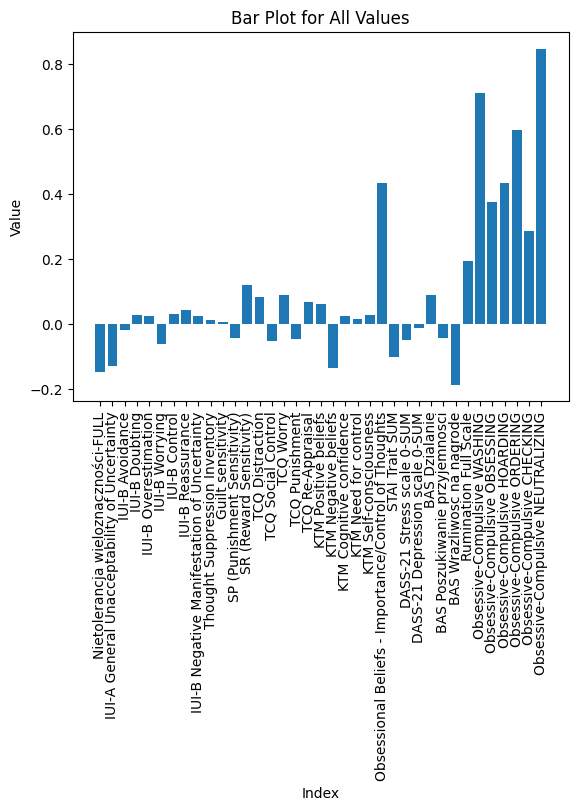

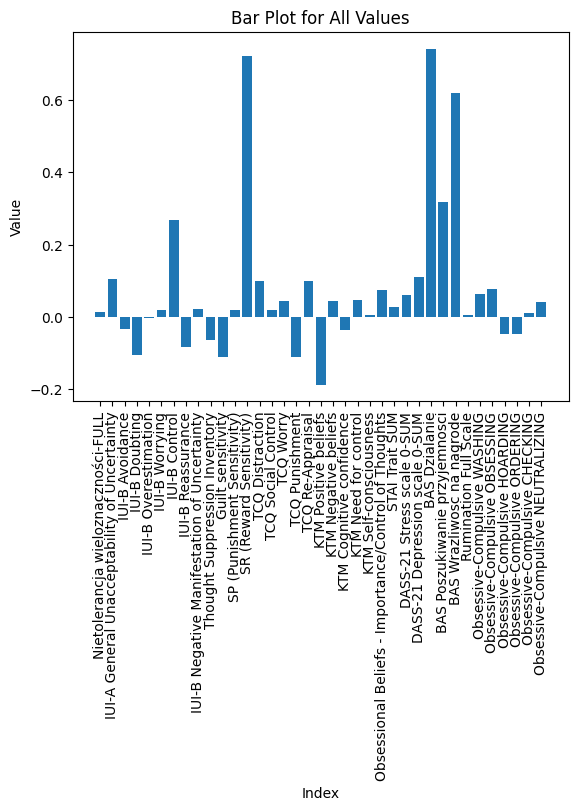

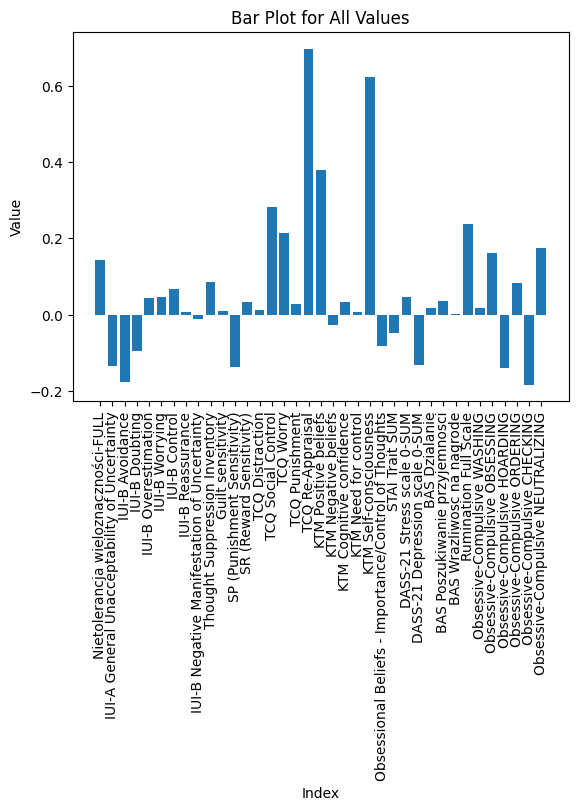

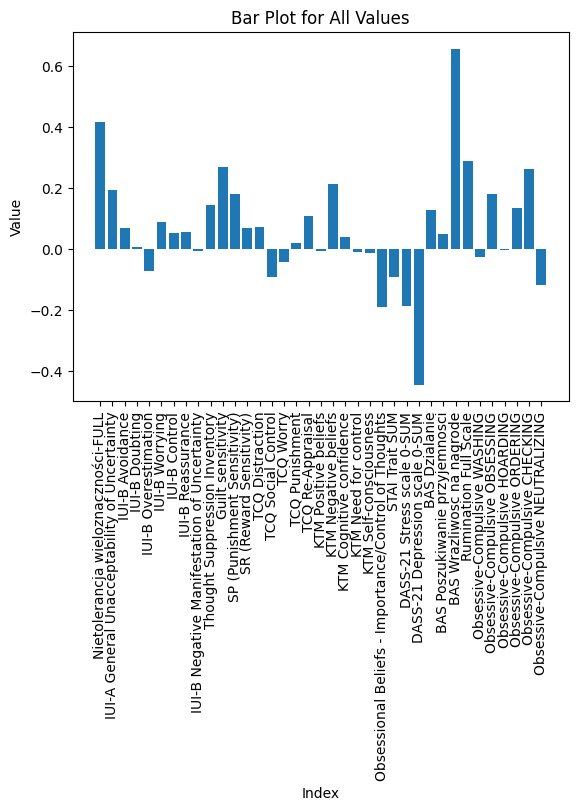

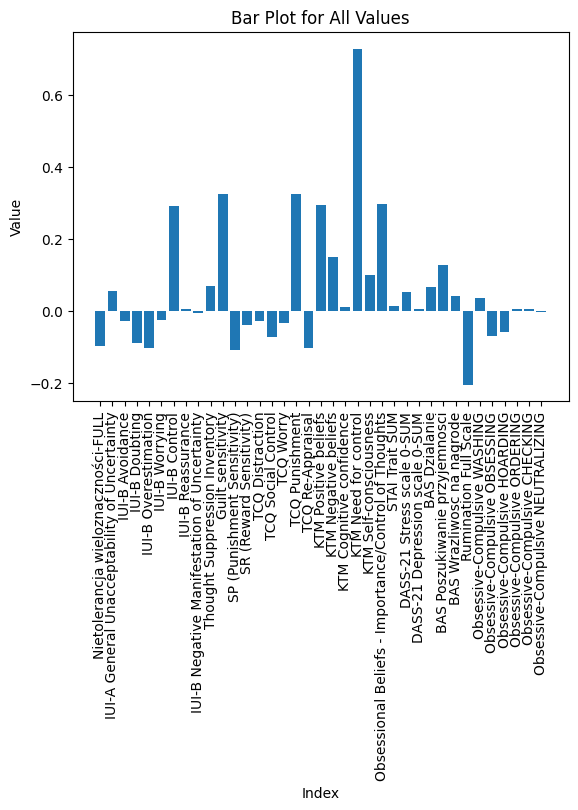

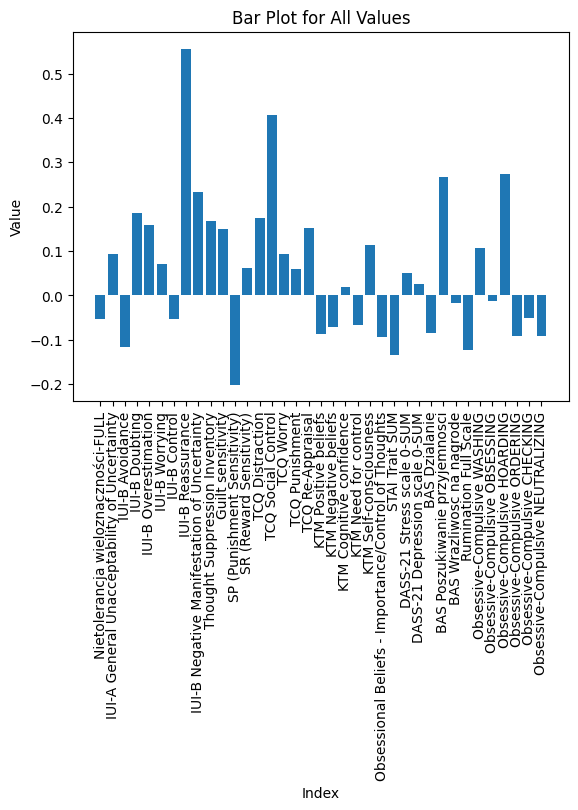

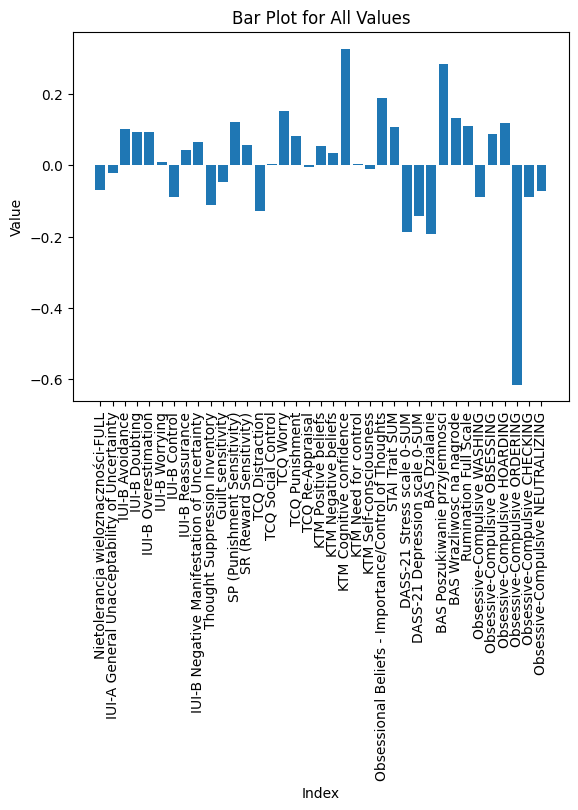

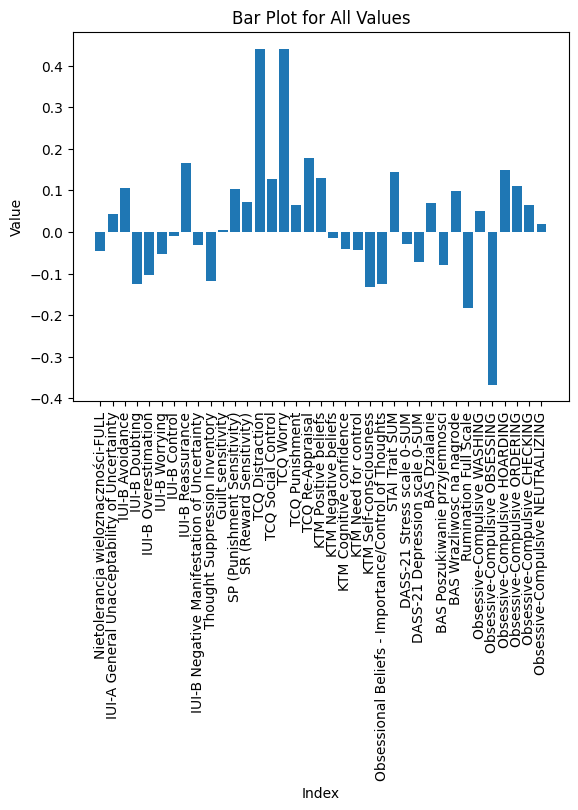

In [100]:
for index, factor in enumerate(factor_loadings.copy().T):
    plt.figure(index)
    plt.bar(x=np.arange(len(factor)), height=factor)
    plt.title('Bar Plot for All Values')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.xticks(np.arange(len(factor)), columns, rotation=90)
    plt.show()

In [106]:
factors_data_df = pd.DataFrame(fa.transform(data_for_factor_df), columns=np.arange(0, n_factors))
factors_data_df

0         1         2         3         4         5         6  \
0   -0.967371  0.793201 -0.696635 -0.060640 -0.005313 -0.221483 -1.149310   
1   -0.924474 -0.160012 -0.377210 -1.008938 -0.870747 -0.400672 -1.511235   
2    0.412188 -0.596030 -0.893446 -0.582817 -0.475328 -0.542789 -0.893040   
3    0.039955  0.952914 -0.272714 -1.231208 -2.001420  0.475818  0.042946   
4    0.298301  0.111969 -0.083483  0.230072  0.156614  1.496485  0.763862   
..        ...       ...       ...       ...       ...       ...       ...   
220  1.246250  1.429140  0.980101 -0.249863  0.017646  1.217201 -0.244777   
221 -1.042208 -0.454180 -0.935750 -1.251912 -1.447843 -0.608258 -1.341073   
222  0.556244  1.072006  0.287936  0.338409  0.396149  0.036724  0.474098   
223  1.323326  1.647488 -0.451913 -0.887655 -0.278366  0.699823 -0.810783   
224 -1.750000 -1.803711 -1.646484  2.363281 -0.085938 -0.710938 -0.332031   

            7         8         9  
0    0.688381  0.529899 -0.322886  
1    0.288067  0.349250 -0.706372  
2   -1.390098  0.540708  2.025527  
3    1.203486  1.785403 -0.018874  
4    0.334375 -0.787637 -0.341313  
..        ...       ...       ...  
220  0.923942  0.572402 -0.457493  
221 -1.096815 -0.149516 -0.284542  
222 -0.448859  0.828476  0.372315  
223 -0.587568  0.965387  0.043304  
224  1.074219 -0.517664  0.818040  

[225 rows x 10 columns]

In [108]:
columns2 = [
    'ID',
    'number_error',
    'Płeć',
]

data_id_df = data_df[columns2]
data_id_df['Płeć'] = data_id_df['Płeć'].replace('Osoba niebinarna', 0.5)

/tmp/ipykernel_36276/2114223477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_id_df['Płeć'] = data_id_df['Płeć'].replace('Osoba niebinarna', 0.5)


In [113]:
data_df_factor = pd.concat([data_id_df, factors_data_df], axis=1)
data_df_factor

ID  number_error Płeć         0         1         2         3         4  \
0     32            77    0 -0.967371  0.793201 -0.696635 -0.060640 -0.005313   
1     95            57    1 -0.924474 -0.160012 -0.377210 -1.008938 -0.870747   
2      5            17    0  0.412188 -0.596030 -0.893446 -0.582817 -0.475328   
3     67            28    0  0.039955  0.952914 -0.272714 -1.231208 -2.001420   
4      4            51    0  0.298301  0.111969 -0.083483  0.230072  0.156614   
..   ...           ...  ...       ...       ...       ...       ...       ...   
220  132            22    0  1.246250  1.429140  0.980101 -0.249863  0.017646   
221   68            45    1 -1.042208 -0.454180 -0.935750 -1.251912 -1.447843   
222  116            19    0  0.556244  1.072006  0.287936  0.338409  0.396149   
223   13            27    0  1.323326  1.647488 -0.451913 -0.887655 -0.278366   
224  125            17    0 -1.750000 -1.803711 -1.646484  2.363281 -0.085938   

            5         6         7         8         9  
0   -0.221483 -1.149310  0.688381  0.529899 -0.322886  
1   -0.400672 -1.511235  0.288067  0.349250 -0.706372  
2   -0.542789 -0.893040 -1.390098  0.540708  2.025527  
3    0.475818  0.042946  1.203486  1.785403 -0.018874  
4    1.496485  0.763862  0.334375 -0.787637 -0.341313  
..        ...       ...       ...       ...       ...  
220  1.217201 -0.244777  0.923942  0.572402 -0.457493  
221 -0.608258 -1.341073 -1.096815 -0.149516 -0.284542  
222  0.036724  0.474098 -0.448859  0.828476  0.372315  
223  0.699823 -0.810783 -0.587568  0.965387  0.043304  
224 -0.710938 -0.332031  1.074219 -0.517664  0.818040  

[225 rows x 13 columns]

---

### Read DDM data

In [55]:
d_df = pd.read_csv('../data/sonata_data_standarized.csv')
mapping_df = d_df.drop_duplicates(subset=['ID'])[['ID', 'participant_index']]

df_erp = pd.DataFrame()

df_erp[['ID', 'Peak_Ne']] = d_df[d_df['pre_acc'] == -1].groupby('ID')['pre_ne_FCz_standarized'].mean().reset_index()
df_erp[['ID', 'Peak_Nc']] = d_df[d_df['pre_acc'] == 1].groupby('ID')['pre_ne_FCz_standarized'].mean().reset_index()
df_erp[['ID', 'Mean_Ne']] = d_df[d_df['pre_acc'] == -1].groupby('ID')['pre_ne_mean_Fz'].mean().reset_index()
df_erp[['ID', 'Mean_Nc']] = d_df[d_df['pre_acc'] == 1].groupby('ID')['pre_ne_mean_Fz'].mean().reset_index()
df_erp[['ID', 'num_err_trials']] = d_df[d_df['acc'] == -1].groupby('ID')['acc'].count().reset_index()
df_erp[['ID', 'num_corr_trials']] = d_df[d_df['acc'] == 1].groupby('ID')['acc'].count().reset_index()

df_erp[['ID', 'num_err_congruent_trials']] = d_df[(d_df['acc'] == -1) & (d_df['condition'] == 1)].groupby('ID')['acc'].count().reset_index()
df_erp[['ID', 'num_corr_congruent_trials']] = d_df[(d_df['acc'] == 1) & (d_df['condition'] == 1)].groupby('ID')['acc'].count().reset_index()
df_erp[['ID', 'num_err_incongruent_trials']] = d_df[(d_df['acc'] == -1) & (d_df['condition'] == -1)].groupby('ID')['acc'].count().reset_index()
df_erp[['ID', 'num_corr_incongruent_trials']] = d_df[(d_df['acc'] == 1) & (d_df['condition'] == -1)].groupby('ID')['acc'].count().reset_index()

In [80]:
df_erp.groupby('ID')[['num_err_trials', 'num_corr_trials']].mean().describe()

num_err_trials  num_corr_trials
count      222.000000       222.000000
mean        24.945946       202.171171
std          8.261931        37.464161
min          5.000000       107.000000
25%         19.250000       180.000000
50%         25.000000       207.500000
75%         31.000000       227.750000
max         42.000000       276.000000

In [10]:
path = '../plgrid_results/cond_models/sonata'
model = 'drift_boundary_pre3_tbb'

file_path = f'{path}/{model}/results/{model}_summary_with_bf_plgrid_test.csv'
ddm_results_df = pd.read_csv(file_path).rename(columns={'Unnamed: 0': 'Variable'})

# remove not participants-related samples
df_cleaned = ddm_results_df[ddm_results_df['Variable'].str.contains('participant')]

# create index column
df_cleaned['participant_index'] = df_cleaned['Variable'].str.extract(r'\[(\d+)\]').astype('Int64')

# add ID info
df_merged = pd.merge(df_cleaned, mapping_df, on='participant_index', how='left').merge(df_erp, on='ID',  how='left')

# remove info on index from variable name
df_merged['Variable'] = df_merged['Variable'].str.replace(r'\[\d+\]', '', regex=True)

/tmp/ipykernel_5703/3814859060.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['participant_index'] = df_cleaned['Variable'].str.extract(r'\[(\d+)\]').astype('Int64')


Merge dataframes

In [11]:
data_ddm_behavioral_df = pd.merge(df_merged, data_df, on='ID', how='left')
data_ddm_behavioral_df.head()

Variable      Mean      MCSE    StdDev        2%       98%  \
0  participants_ter  0.102287  0.000081  0.004064  0.093120  0.109663   
1  participants_ter  0.172940  0.000065  0.004814  0.162420  0.181983   
2  participants_ter  0.166041  0.000047  0.003404  0.158173  0.172173   
3  participants_ter  0.118630  0.000044  0.002979  0.111814  0.123860   
4  participants_ter  0.109906  0.000053  0.003628  0.101409  0.116093   

     N_Eff   N_Eff/s     R_hat  Bayes_factor  ...  \
0  2533.79  0.042468  1.001630           NaN  ...   
1  5568.53  0.093333  1.000390           NaN  ...   
2  5322.27  0.089206  0.999875           NaN  ...   
3  4512.36  0.075631  1.001890           NaN  ...   
4  4682.25  0.078478  1.000470           NaN  ...   

   Obsessive-Compulsive OBSESSING  Obsessive-Compulsive HOARDING  \
0                        3.333333                       1.000000   
1                        4.000000                       2.000000   
2                        1.666667                       1.000000   
3                        3.333333                       3.333333   
4                        2.666667                       2.333333   

   Obsessive-Compulsive ORDERING  Obsessive-Compulsive CHECKING  \
0                       4.333333                       4.333333   
1                       1.000000                       2.333333   
2                       1.333333                       1.333333   
3                       1.000000                       3.000000   
4                       2.000000                       2.666667   

   Obsessive-Compulsive NEUTRALIZING  Rumination Full Scale  \
0                           2.333333               4.416667   
1                           1.000000               4.333333   
2                           1.333333               4.333333   
3                           2.000000               4.583333   
4                           1.000000               2.666667   

   Nietolerancja wieloznaczności-FULL  SR (Reward Sensitivity)  number_error  \
0                                4.33                        2            42   
1                                4.83                        6            11   
2                                4.33                        3            14   
3                                4.17                        6            37   
4                                5.17                        5            44   

   Płeć  
0     1  
1     1  
2     1  
3     0  
4     0  

[5 rows x 52 columns]

In [28]:
data_ddm_behavioral_df[data_ddm_behavioral_df['number_error'] < 6]['ID'].unique()

array([ 45, 173])

In [38]:
np.unique(data_ddm_behavioral_df['ID'].to_numpy())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [33]:
data_ddm_behavioral_df[data_ddm_behavioral_df['ID'] == 20]

Empty DataFrame
Columns: [Variable, Mean, MCSE, StdDev, 2%, 98%, N_Eff, N_Eff/s, R_hat, Bayes_factor, participant_index, ID, Peak_Ne, Peak_Nc, Mean_Ne, Mean_Nc, num_err_trials, num_corr_trials, num_err_congruent_trials, num_corr_congruent_trials, num_err_incongruent_trials, num_corr_incongruent_trials, IUI-A General Unacceptability of Uncertainty, IUI-B Avoidance, IUI-B Doubting, IUI-B Overestimation, IUI-B Worrying, IUI-B Control, IUI-B Reassurance, IUI-B Negative Manifestation of Uncertainty, TCQ Distraction, TCQ Social Control, TCQ Worry, TCQ Punishment, TCQ Re-Appraisal, KTM Positive beliefs, KTM Negative beliefs, KTM Cognitive confidence, KTM Need for control, KTM Self-consciousness, BIS, Obsessive-Compulsive WASHING, Obsessive-Compulsive OBSESSING, Obsessive-Compulsive HOARDING, Obsessive-Compulsive ORDERING, Obsessive-Compulsive CHECKING, Obsessive-Compulsive NEUTRALIZING, Rumination Full Scale, Nietolerancja wieloznaczności-FULL, SR (Reward Sensitivity), number_error, Płeć]
Index: []

[0 rows x 52 columns]

In [47]:
d_df[(d_df['ID'] == 173)]

Unnamed: 0  trial_number   ID  participant_index  condition  \
46444       61200             1  173                205        1.0   
46445       61201             2  173                205       -1.0   
46446       61202             3  173                205        1.0   
46447       61205             6  173                205        1.0   
46448       61206             7  173                205        1.0   
...           ...           ...  ...                ...        ...   
46679       61495           296  173                205        1.0   
46680       61496           297  173                205       -1.0   
46681       61497           298  173                205        1.0   
46682       61498           299  173                205        1.0   
46683       61499           300  173                205        1.0   

       condition_index        rt  acc      ne_Fz     ne_FCz  ...         y  \
46444              1.0  0.298962  1.0 -12.030055  -8.046754  ...  0.298962   
46445              2.0  0.222506 -1.0 -18.254826 -24.176930  ... -0.222506   
46446              1.0  0.243460  1.0   1.943968   4.098231  ...  0.243460   
46447              1.0  0.215704  1.0  -0.418614   2.038895  ...  0.215704   
46448              1.0  0.243373  1.0  -3.446849   2.189408  ...  0.243373   
...                ...       ...  ...        ...        ...  ...       ...   
46679              1.0  0.271450  1.0  -6.048348  -5.320713  ...  0.271450   
46680              2.0  0.361483  1.0   2.421670   0.586668  ...  0.361483   
46681              1.0  0.229553  1.0   0.596445   1.216008  ...  0.229553   
46682              1.0  0.278195  1.0  -8.994969  -9.062961  ...  0.278195   
46683              1.0  0.215748  1.0   1.434431   3.895277  ...  0.215748   

       pre_ne_Fz  pre_ne_FCz  pre_ne_mean_Fz  pre_ne_mean_FCz  pre_acc  \
46444  -4.301224   -1.433269       -1.573927         0.903613      1.0   
46445 -12.030055   -8.046754       -8.230022        -4.397729      1.0   
46446 -18.254826  -24.176930       -9.938480       -13.803632     -1.0   
46447   1.711625    0.066188        3.372685         1.359430      1.0   
46448  -0.418614    2.038895        2.080054         3.569591      1.0   
...          ...         ...             ...              ...      ...   
46679   2.629793    6.265216        4.585598         8.837562      1.0   
46680  -6.048348   -5.320713       -1.632777         0.784430      1.0   
46681   2.421670    0.586668        5.032000         3.563821      1.0   
46682   0.596445    1.216008        1.684169         4.084288      1.0   
46683  -8.994969   -9.062961       -4.861715        -4.342054      1.0   

       rt_greater_than_1  log_rt_exceed_threshold  is_in_sequence  \
46444              False                    False            True   
46445              False                    False            True   
46446              False                    False            True   
46447              False                    False            True   
46448              False                    False            True   
...                  ...                      ...             ...   
46679              False                    False            True   
46680              False                    False            True   
46681              False                    False            True   
46682              False                    False            True   
46683              False                    False            True   

       pre_ne_FCz_standarized  
46444                0.080145  
46445               -0.857894  
46446               -3.145754  
46447                0.292824  
46448                0.572628  
...                       ...  
46679                1.172077  
46680               -0.471239  
46681                0.366648  
46682                0.455911  
46683               -1.002030  

[240 rows x 22 columns]

Investigate data

In [136]:
cols = [
    'participant_index', 
    'Mean_Ne', 
    'Mean_Nc', 
    'Peak_Ne', 
    'Peak_Nc', 
    'num_err_trials', 
    'num_corr_trials',
    'num_err_congruent_trials',
    'num_corr_congruent_trials',
    'num_err_incongruent_trials',
    'num_corr_incongruent_trials',
]

In [137]:
df_pivoted_bf = data_ddm_behavioral_df.pivot_table(index= cols + data_df.columns.to_list(), columns='Variable', values='Bayes_factor', aggfunc='mean').reset_index()

In [138]:
display(df_pivoted_bf[df_pivoted_bf['participants_alpha_cond'] > 0.1][['ID', 'num_err_trials', 'num_corr_trials', 'num_err_congruent_trials','num_corr_congruent_trials','num_err_incongruent_trials','num_corr_incongruent_trials',]])
display(df_pivoted_bf[df_pivoted_bf['participants_delta_cond'] > 0.1][['ID', 'num_err_trials', 'num_corr_trials', 'num_err_congruent_trials','num_corr_congruent_trials','num_err_incongruent_trials','num_corr_incongruent_trials',]])

Variable  ID  num_err_trials  num_corr_trials  num_err_congruent_trials  \
12        32               5              177                       3.0   
18        25               8              276                       2.0   
27        69              39              111                       2.0   
43        86              15              176                       1.0   
68        61               8              251                       2.0   
96         2               9              200                       4.0   

Variable  num_corr_congruent_trials  num_err_incongruent_trials  \
12                              129                           4   
18                              196                           8   
27                              104                          36   
43                              127                           6   
68                              181                           7   
96                              137                           4   

Variable  num_corr_incongruent_trials  
12                                 48  
18                                 80  
27                                  7  
43                                 49  
68                                 70  
96                                 63

Variable  ID  num_err_trials  num_corr_trials  num_err_congruent_trials  \
43        86              15              176                       1.0   
96         2               9              200                       4.0   

Variable  num_corr_congruent_trials  num_err_incongruent_trials  \
43                              127                           6   
96                              137                           4   

Variable  num_corr_incongruent_trials  
43                                 49  
96                                 63

Create data for correlation

In [139]:
cols = [
    'participant_index', 
    'Mean_Ne', 
    'Mean_Nc', 
    'Peak_Ne', 
    'Peak_Nc', 
    'num_err_trials', 
    'num_corr_trials',
    'num_err_congruent_trials',
    'num_corr_congruent_trials',
    'num_err_incongruent_trials',
    'num_corr_incongruent_trials',
]

In [140]:
df_pivoted = data_ddm_behavioral_df.pivot_table(index= cols + data_df.columns.to_list(), columns='Variable', values='Mean', aggfunc='mean').reset_index()

In [141]:
# Convert MultiIndex columns to simple index with modified column names
# df_pivoted.columns = ['{}_{}'.format(col[0], col[1]) for col in df_pivoted.columns]

In [142]:
final_data_df = df_pivoted.copy().drop(['ID', 'participant_index'], axis=1)
final_data_df = final_data_df.astype(float)
final_data_df.head()

Variable    Mean_Ne   Mean_Nc   Peak_Ne   Peak_Nc  num_err_trials  \
0         -6.797395  1.640025 -0.974500  0.185515            34.0   
1         -5.374974  5.401874 -2.087862  0.060576            10.0   
2         -2.436518 -1.042595 -0.196663  0.110061            38.0   
3        -12.578671 -4.076158 -1.532311  0.205907            27.0   
4         -0.134003  8.551578 -0.843010  0.197102            33.0   

Variable  num_corr_trials  num_err_congruent_trials  \
0                   174.0                       1.0   
1                   257.0                       1.0   
2                   128.0                       2.0   
3                   207.0                       1.0   
4                   189.0                       1.0   

Variable  num_corr_congruent_trials  num_err_incongruent_trials  \
0                             148.0                        34.0   
1                             185.0                        10.0   
2                             112.0                        35.0   
3                             166.0                        27.0   
4                             152.0                        33.0   

Variable  num_corr_incongruent_trials  ...  participants_alpha_ern  \
0                                26.0  ...               -0.058316   
1                                72.0  ...               -0.068583   
2                                16.0  ...               -0.047866   
3                                41.0  ...               -0.077011   
4                                37.0  ...               -0.063990   

Variable  participants_alpha_ne  participants_alpha_ne_pre_acc  \
0                     -0.016246                       0.042070   
1                     -0.034556                       0.034027   
2                     -0.026710                       0.021156   
3                     -0.059677                       0.017334   
4                     -0.038039                       0.025951   

Variable  participants_delta  participants_delta_cond  participants_delta_crn  \
0                    4.38298                  4.44228               -0.003809   
1                    4.36593                  2.05122                0.032132   
2                    1.90356                  2.63818               -0.000211   
3                    4.47681                  3.65432                0.002479   
4                    5.66720                  5.18936                0.002944   

Variable  participants_delta_ern  participants_delta_ne  \
0                      -0.138384              -0.071096   
1                      -0.154120              -0.060994   
2                      -0.148231              -0.074221   
3                      -0.154624              -0.076073   
4                      -0.147253              -0.072154   

Variable  participants_delta_ne_pre_acc  participants_ter  
0                              0.067288          0.124677  
1                              0.093126          0.106105  
2                              0.074010          0.103048  
3                              0.078551          0.149368  
4                              0.075099          0.151111  

[5 rows x 53 columns]

In [79]:
final_data_df.to_csv('behavioral_results_ddm.csv')

## Create a correlation matrix

In [143]:
def r_pvalues(df, method='fdr_by'):
    cols = pd.DataFrame(columns=df.columns)
    p = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)

    # Flatten the p-values matrix for correction
    p_values_flat = p.values[np.triu_indices_from(p, k=1)]
    
    # FDR Correction (Benjamini-Hochberg)
    _, p_fdr, _, _ = multipletests(p_values_flat, alpha=0.05, method=method)
    
    # Reshape the corrected p-values back into a matrix
    p_fdr_matrix = np.ones_like(p)
    
    p_fdr_matrix[np.triu_indices_from(p, k=1)] = p_fdr
    p_fdr_matrix = p_fdr_matrix.T
    p_fdr_matrix[np.triu_indices_from(p, k=1)] = p_fdr
    
    # Create DataFrames for corrected p-values
    p_fdr_df = pd.DataFrame(p_fdr_matrix, columns=df.columns, index=df.columns)
    return p, p_fdr_df

In [144]:
correlation_matrix = final_data_df.corr()
p_values, p_values_fdr_corrected = r_pvalues(final_data_df, method='fdr_bh')

significant_correlations = correlation_matrix[(p_values <= 0.1)]
significant_correlations_corrected = correlation_matrix[(p_values_fdr_corrected <= 0.1)]

/tmp/ipykernel_5779/1467152024.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)


In [145]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,):
    display(correlation_matrix)

Variable                                       Mean_Ne   Mean_Nc   Peak_Ne  \
Variable                                                                     
Mean_Ne                                       1.000000  0.445952  0.655900   
Mean_Nc                                       0.445952  1.000000 -0.194795   
Peak_Ne                                       0.655900 -0.194795  1.000000   
Peak_Nc                                      -0.447160  0.232419 -0.621492   
num_err_trials                                0.145177  0.300351  0.044153   
num_corr_trials                              -0.185663 -0.267815 -0.191841   
num_err_congruent_trials                     -0.076702 -0.096933  0.012098   
num_corr_congruent_trials                    -0.216338 -0.256086 -0.249615   
num_err_incongruent_trials                    0.093442  0.263290 -0.012308   
num_corr_incongruent_trials                  -0.134420 -0.265844 -0.105379   
IUI-A General Unacceptability of Uncertainty -0.049647 -0.201146  0.081746   
IUI-B Avoidance                              -0.020251  0.011467  0.010844   
IUI-B Doubting                               -0.053834 -0.143940  0.036364   
IUI-B Overestimation                         -0.071996 -0.185873  0.001124   
IUI-B Worrying                               -0.051269 -0.182719  0.075824   
IUI-B Control                                 0.034440 -0.130143  0.068904   
IUI-B Reassurance                            -0.023544 -0.134221  0.050337   
IUI-B Negative Manifestation of Uncertainty  -0.043552 -0.176048  0.054052   
TCQ Distraction                               0.034418  0.154103  0.027465   
TCQ Social Control                           -0.069339  0.069458 -0.015797   
TCQ Worry                                    -0.077863 -0.173368  0.087265   
TCQ Punishment                               -0.051236 -0.035022 -0.018943   
TCQ Re-Appraisal                              0.000233 -0.004137  0.018800   
KTM Positive beliefs                          0.056563  0.006740  0.104265   
KTM Negative beliefs                         -0.085522 -0.200110  0.037741   
KTM Cognitive confidence                     -0.124434 -0.071508 -0.115525   
KTM Need for control                          0.088018  0.032359  0.035876   
KTM Self-consciousness                       -0.130447  0.021042 -0.215737   
BIS                                          -0.073682 -0.308519  0.175810   
Obsessive-Compulsive WASHING                 -0.126891 -0.032016 -0.117885   
Obsessive-Compulsive OBSESSING               -0.191305 -0.197617 -0.057983   
Obsessive-Compulsive HOARDING                -0.007088  0.096468 -0.059860   
Obsessive-Compulsive ORDERING                 0.132136  0.135100  0.041973   
Obsessive-Compulsive CHECKING                 0.042863 -0.043543 -0.005239   
Obsessive-Compulsive NEUTRALIZING            -0.065068  0.061134 -0.097013   
Rumination Full Scale                        -0.163025 -0.099759 -0.065529   
Nietolerancja wieloznaczności-FULL           -0.181299 -0.260905  0.033758   
SR (Reward Sensitivity)                       0.050177  0.022777  0.026143   
number_error                                  0.114433  0.035612  0.122098   
Płeć                                          0.080193  0.242215 -0.112531   
participants_alpha                           -0.046147 -0.225023 -0.077049   
participants_alpha_cond                      -0.113232 -0.067646 -0.257335   
participants_alpha_crn                       -0.116053  0.101154 -0.167791   
participants_alpha_ern                        0.096635  0.142128  0.127673   
participants_alpha_ne                        -0.041170  0.161210 -0.066192   
participants_alpha_ne_pre_acc                -0.152503  0.003941 -0.213629   
participants_delta                           -0.302009 -0.209073 -0.330603   
participants_delta_cond                      -0.179653  0.054386 -0.270853   
participants_delta_crn                       -0.210341 -0.043779 -0.198944   
participants_delta_ern

In [146]:
significant_correlations.to_csv('corrs.csv')
significant_correlations_corrected.to_csv('corrs_corrected.csv')

### Joint plots

In [ ]:
g = sns.PairGrid(data=final_data_df, diag_sharey=False)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

g.fig.tight_layout()
fig = plt.gcf()
plt.savefig(f'variables_pair_plots.png', bbox_inches='tight')

In [ ]:
g = sns.PairGrid(data=final_data_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

g.fig.tight_layout()
fig = plt.gcf()
plt.savefig(f'variables_pair_plots2.png', bbox_inches='tight')

### Plots

<Axes: xlabel='participants_delta_crn', ylabel='Płeć'>

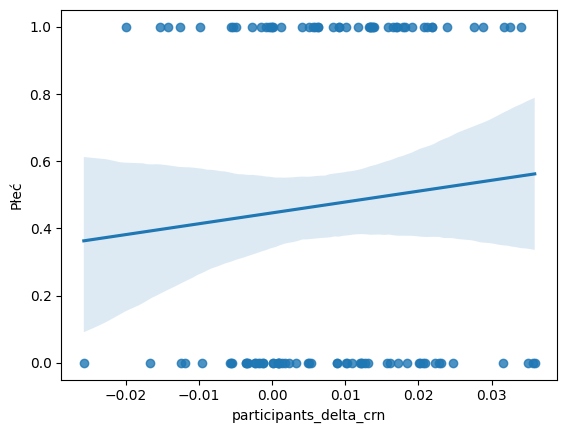

In [128]:
sns.regplot(
    data=final_data_df,
    x='participants_delta_crn',
    y='Płeć',
)

In [103]:
df_pivoted_bf = data_ddm_behavioral_df.pivot_table(index= cols + data_df.columns.to_list(), columns='Variable', values='Bayes_factor', aggfunc='mean').reset_index()
final_data_df_bf = df_pivoted_bf.copy().drop(['ID', 'participant_index'], axis=1)
final_data_df_bf = final_data_df_bf.astype(float)
final_data_df_bf.head()

Variable    Mean_Ne   Mean_Nc   Peak_Ne   Peak_Nc  num_err_trials  \
0         -6.797395  1.640025 -0.974500  0.185515            34.0   
1         -5.374974  5.401874 -2.087862  0.060576            10.0   
2         -2.436518 -1.042595 -0.196663  0.110061            38.0   
3        -12.578671 -4.076158 -1.532311  0.205907            27.0   
4         -0.134003  8.551578 -0.843010  0.197102            33.0   

Variable  num_corr_trials  num_err_congruent_trials  \
0                   174.0                       1.0   
1                   257.0                       1.0   
2                   128.0                       2.0   
3                   207.0                       1.0   
4                   189.0                       1.0   

Variable  num_corr_congruent_trials  num_err_incongruent_trials  \
0                             148.0                        34.0   
1                             185.0                        10.0   
2                             112.0                        35.0   
3                             166.0                        27.0   
4                             152.0                        33.0   

Variable  num_corr_incongruent_trials  ...  participants_alpha_cond  \
0                                26.0  ...            7.509239e-121   
1                                72.0  ...             4.717535e-97   
2                                16.0  ...             1.040553e-28   
3                                41.0  ...            1.157117e-169   
4                                37.0  ...            1.030458e-279   

Variable  participants_alpha_crn  participants_alpha_ern  \
0                       6.375650                2.100403   
1                       8.023827                1.509300   
2                       9.103715                3.257409   
3                       3.298578                0.913876   
4                       9.164505                1.347252   

Variable  participants_alpha_ne  participants_alpha_ne_pre_acc  \
0                      9.260703                       2.307514   
1                      4.174618                       4.177563   
2                      5.614918                       8.120561   
3                      0.450959                       8.636918   
4                      2.517199                       6.188115   

Variable  participants_delta_cond  participants_delta_crn  \
0                    0.000000e+00               12.801971   
1                   7.135652e-243               10.666560   
2                    0.000000e+00               12.893316   
3                    0.000000e+00               13.295857   
4                    0.000000e+00               13.037257   

Variable  participants_delta_ern  participants_delta_ne  \
0                       1.105424               2.119874   
1                       0.693522               3.802003   
2                       0.778969               2.121835   
3                       0.511021               1.502560   
4                       0.898990               1.899422   

Variable  participants_delta_ne_pre_acc  
0                              2.910891  
1                              0.944325  
2                              2.512372  
3                              1.996824  
4                              2.182683  

[5 rows x 50 columns]

<Axes: xlabel='participants_delta_ern', ylabel='num_err_trials'>

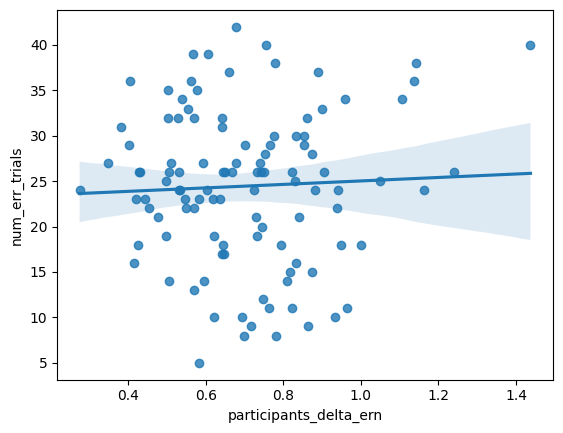

In [106]:
sns.regplot(
    data=final_data_df_bf,
    x='participants_delta_ern',
    y='num_err_trials',
)

### PES analysis

In [2]:
d_df = pd.read_csv('../data/sonata_data_standarized.csv')
d_df.head()

Unnamed: 0  trial_number   ID  participant_index  condition  \
0           3             4  169                  1        1.0   
1           4             5  169                  1       -1.0   
2           5             6  169                  1        1.0   
3           6             7  169                  1        1.0   
4           7             8  169                  1        1.0   

   condition_index        rt  acc     ne_Fz    ne_FCz  ...         y  \
0              1.0  0.309485  1.0  0.790637  0.747574  ...  0.309485   
1              2.0  0.386673  1.0 -2.980749 -5.791032  ...  0.386673   
2              1.0  0.316943  1.0  2.572565 -1.050971  ...  0.316943   
3              1.0  0.278136  1.0  2.280077  0.960363  ...  0.278136   
4              1.0  0.316809  1.0 -6.511949 -8.959696  ...  0.316809   

   pre_ne_Fz  pre_ne_FCz  pre_ne_mean_Fz  pre_ne_mean_FCz  pre_acc  \
0  -3.449400   -3.684688       -1.556821         2.632504      1.0   
1   0.790637    0.747574        4.928352         6.436701      1.0   
2  -2.980749   -5.791032       -0.957992        -1.689976      1.0   
3   2.572565   -1.050971        4.401086         7.993626      1.0   
4   2.280077    0.960363       11.493082         9.934797      1.0   

   rt_greater_than_1  log_rt_exceed_threshold  is_in_sequence  \
0              False                    False            True   
1              False                    False            True   
2              False                    False            True   
3              False                    False            True   
4              False                    False            True   

   pre_ne_FCz_standarized  
0                0.010745  
1                0.528828  
2               -0.235464  
3                0.318598  
4                0.553701  

[5 rows x 22 columns]

Intra-individual effect

<Axes: xlabel='rt', ylabel='Count'>

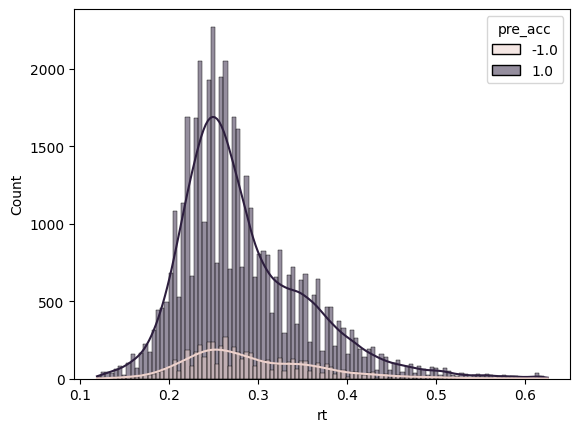

In [3]:
sns.histplot(d_df, kde=True, x='rt', hue='pre_acc')

In [15]:
from scipy.stats import ttest_ind
test_df = d_df

print(f"post error rt vs post correct rt: {ttest_ind(test_df[test_df['pre_acc'] == -1]['rt'], test_df[test_df['pre_acc'] == 1]['rt'])}")
print(f"post error mean rt: {test_df[test_df['pre_acc'] == -1]['rt'].mean()}\npost correct mean rt:{test_df[test_df['pre_acc'] == 1]['rt'].mean()}\n")


print(f"post error vs post correct in incongruent: {ttest_ind(test_df[(test_df['pre_acc'] == -1) & (test_df['condition'] == -1)]['rt'], test_df[(test_df['pre_acc'] == 1) & (test_df['condition'] == -1)]['rt'])}")
print(f"post error vs post correct in congruent: {ttest_ind(test_df[(test_df['pre_acc'] == -1) & (test_df['condition'] == 1)]['rt'], test_df[(test_df['pre_acc'] == 1) & (test_df['condition'] == 1)]['rt'])}")

post error rt vs post correct rt: TtestResult(statistic=11.501929951542289, pvalue=1.4085583939257607e-30, df=50418.0)
post error mean rt: 0.2947002208667655
post correct mean rt:0.2831541732935876

post error vs post correct in incongruent: TtestResult(statistic=6.282974078737294, pvalue=3.4123918249864945e-10, df=15139.0)
post error vs post correct in congruent: TtestResult(statistic=11.071557477293961, pvalue=1.920310364929273e-28, df=35277.0)


Inter-individual effect

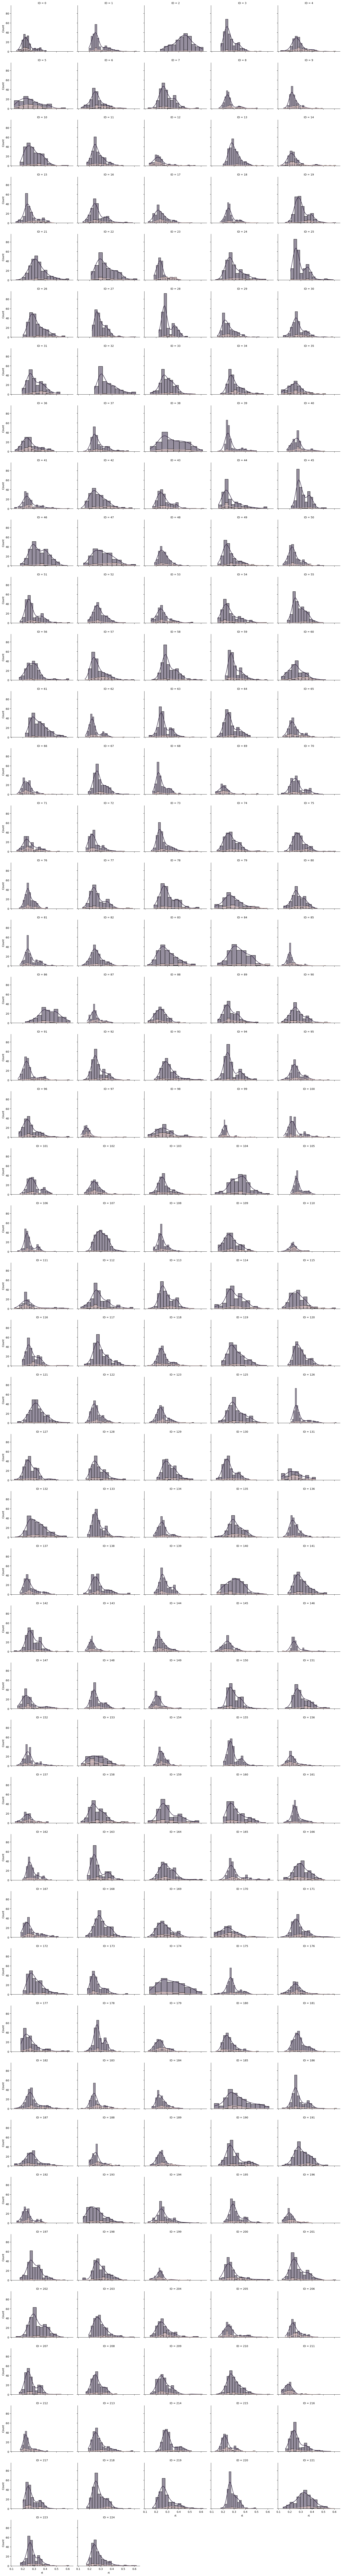

In [4]:
g = sns.FacetGrid(d_df, col='ID', col_wrap=5, height=3, aspect=1.2)

g.map_dataframe(
    sns.histplot,
    x='rt',
    kde=True,
    hue='pre_acc'
)

In [21]:
_, p = ttest_ind(test_df[test_df['pre_acc'] == -1]['rt'], test_df[test_df['pre_acc'] == 1]['rt'])

TtestResult(statistic=0.4091184116268125, pvalue=0.6828044425546023, df=249.0)

In [22]:
for id in np.unique(d_df['ID'].to_numpy()):
    test_df = d_df[d_df['ID'] == id]

    _, post_error_correct_p = ttest_ind(test_df[test_df['pre_acc'] == -1]['rt'], test_df[test_df['pre_acc'] == 1]['rt'])

    if post_error_correct_p > 0.05:
        print(f'Participant {id} has no PES effect')

Participant 0 has no PES effect
Participant 1 has no PES effect
Participant 2 has no PES effect
Participant 5 has no PES effect
Participant 7 has no PES effect
Participant 10 has no PES effect
Participant 11 has no PES effect
Participant 12 has no PES effect
Participant 16 has no PES effect
Participant 17 has no PES effect
Participant 21 has no PES effect
Participant 22 has no PES effect
Participant 25 has no PES effect
Participant 28 has no PES effect
Participant 29 has no PES effect
Participant 32 has no PES effect
Participant 36 has no PES effect
Participant 38 has no PES effect
Participant 41 has no PES effect
Participant 43 has no PES effect
Participant 44 has no PES effect
Participant 45 has no PES effect
Participant 46 has no PES effect
Participant 48 has no PES effect
Participant 51 has no PES effect
Participant 52 has no PES effect
Participant 53 has no PES effect
Participant 54 has no PES effect
Participant 56 has no PES effect
Participant 58 has no PES effect
Participant 59 

---

In [11]:
d_df = pd.read_csv('../data/sonata_data_standarized.csv')
d_df['y_acc'] = d_df['acc'].map(lambda x: 1 if x == 1.0 else 0)
d_df

Unnamed: 0  trial_number   ID  participant_index  condition  \
0               3             4  169                  1        1.0   
1               4             5  169                  1       -1.0   
2               5             6  169                  1        1.0   
3               6             7  169                  1        1.0   
4               7             8  169                  1        1.0   
...           ...           ...  ...                ...        ...   
50415       66593           294  170                222        1.0   
50416       66594           295  170                222        1.0   
50417       66595           296  170                222       -1.0   
50418       66596           297  170                222        1.0   
50419       66599           300  170                222       -1.0   

       condition_index        rt  acc      ne_Fz     ne_FCz  ...  pre_ne_Fz  \
0                  1.0  0.309485  1.0   0.790637   0.747574  ...  -3.449400   
1                  2.0  0.386673  1.0  -2.980749  -5.791032  ...   0.790637   
2                  1.0  0.316943  1.0   2.572565  -1.050971  ...  -2.980749   
3                  1.0  0.278136  1.0   2.280077   0.960363  ...   2.572565   
4                  1.0  0.316809  1.0  -6.511949  -8.959696  ...   2.280077   
...                ...       ...  ...        ...        ...  ...        ...   
50415              1.0  0.306004  1.0  -1.508815  -1.809972  ...  -8.479179   
50416              1.0  0.211662  1.0  -0.221143   1.032869  ...  -1.508815   
50417              2.0  0.260115 -1.0  -9.048478 -18.203901  ...  -0.221143   
50418              1.0  0.292400  1.0 -11.867870 -14.539917  ...  -9.048478   
50419              2.0  0.237299 -1.0   3.250353  -3.949902  ...  -4.050993   

       pre_ne_FCz  pre_ne_mean_Fz  pre_ne_mean_FCz  pre_acc  \
0       -3.684688       -1.556821         2.632504      1.0   
1        0.747574        4.928352         6.436701      1.0   
2       -5.791032       -0.957992        -1.689976      1.0   
3       -1.050971        4.401086         7.993626      1.0   
4        0.960363       11.493082         9.934797      1.0   
...           ...             ...              ...      ...   
50415   -1.286112       -2.066019         4.325929      1.0   
50416   -1.809972       10.658686         9.353297      1.0   
50417    1.032869        1.291188         3.063216      1.0   
50418  -18.203901       -4.820889       -10.670520     -1.0   
50419   -1.294921        3.614124         6.908545      1.0   

       rt_greater_than_1  log_rt_exceed_threshold  is_in_sequence  \
0                  False                    False            True   
1                  False                    False            True   
2                  False                    False            True   
3                  False                    False            True   
4                  False                    False            True   
...                  ...                      ...             ...   
50415              False                    False            True   
50416              False                    False            True   
50417              False                    False            True   
50418              False                    False            True   
50419              False                    False            True   

       pre_ne_FCz_standarized  y_acc  
0                    0.010745      1  
1                    0.528828      1  
2                   -0.235464      1  
3                    0.318598      1  
4                    0.553701      1  
...                       ...    ...  
50415                0.344014      1  
50416                0.277014      1  
50417                0.640604      0  
50418               -1.819719      1  
50419                0.342887      0  

[50420 rows x 23 columns]

In [12]:
rt = d_df['rt'].to_list()
y_acc = d_df['y_acc'].to_list()
condition = d_df['condition'].to_list()
pre_acc = d_df['pre_acc'].to_list()
pre_ne = d_df['pre_ne_FCz_standarized'].to_list()
participant_index = d_df['participant_index'].to_list()

n_participants = len(np.unique(participant_index))
n_conditions = len(np.unique(condition))

In [13]:
data_2d = {
    "N": len(rt),
    "n_conditions": n_conditions,
    "n_participants": n_participants,
    "rt": rt,
    "y_acc": y_acc,
    "condition": condition,
    'pre_ne': pre_ne,
    'pre_acc': pre_acc,
    "participant": participant_index
}

In [14]:
import json

with open("../data/sonata_data_standarized_rt.json", "w") as outfile: 
    json.dump(data_2d, outfile)

---

In [5]:
y_acc = d_df['rt'].to_list()
condition = d_df['condition'].to_list()
pre_acc = d_df['pre_acc'].to_list()
pre_ne = d_df['pre_ne_FCz_standarized'].to_list()
participant_index = d_df['participant_index'].to_list()

n_participants = len(np.unique(participant_index))
n_conditions = len(np.unique(condition))

In [7]:
data_2d = {
    "N": len(rt),
    "n_conditions": n_conditions,
    "n_participants": n_participants,
    "rt": rt,
    "y_acc": 
    "condition": condition,
    'pre_ne': pre_ne,
    'pre_acc': pre_acc,
    "participant": participant_index
}

In [9]:
import json

with open("../data/sonata_data_standarized_rt.json", "w") as outfile: 
    json.dump(data_2d, outfile)